# Relationship between Income and Types of Products Purchased

Looking through the data, we find many of them suitable to be used as predictor variables for our study. In this portion, we will be using economical factors as predictors for the response variables - types of products purchased from the business. The response variables are: 

- Wines 
- Fruits 
- Meats 
- Fish 
- Sweets  
- Gold 

As such, the predictor variable we will be exploring are: 
1. Income

Our hypothesis is that those of a income level have a greater preference for more 'luxurious goods' such as wine and gold as these factors are more likely to influence their income and hence propensity to spend on more 'valuable' items.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
sb.set()

In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [3]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

In [5]:
incomeDf = customerDf.loc[:, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]

## Factoring the average purchases per month 

The helper columns are used to offset the difference in purchase that customers who are enrolled into the company earlier have.

In [6]:
incomeDf['Dt_Customer'] = pd.to_datetime(incomeDf['Dt_Customer'], format='%d-%m-%Y')
incomeDf["CurrentDate"] = datetime.datetime(2021, 1, 1)
incomeDf['numMonths'] = ((incomeDf['CurrentDate'] - incomeDf['Dt_Customer'])/np.timedelta64(1, 'M'))
incomeDf['Recency'] = incomeDf['Recency']/30 #assume 30days in a month

In [7]:
#average purchases over the months
for var in incomeDf.columns[1:7]:
    incomeDf[var] = incomeDf[var]/ (incomeDf["numMonths"] - incomeDf["Recency"])

incomeDf.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

The helper columns is then dropped to clean up the amount of columns in the KNN dataFrame.

In [8]:
incomeDf

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,6.481022,0.898157,5.572659,1.755490,0.898157,0.898157
1,46344.0,0.136519,0.012411,0.074465,0.024822,0.012411,0.074465
2,71613.0,4.867850,0.559917,1.451213,1.268383,0.239964,0.479929
3,26646.0,0.134427,0.048882,0.244412,0.122206,0.036662,0.061103
4,58293.0,2.154818,0.535591,1.469760,0.572957,0.336301,0.186834
...,...,...,...,...,...,...,...
2211,61223.0,7.956164,0.482532,2.042344,0.471310,1.324157,2.771753
2212,64014.0,5.280512,0.000000,0.390186,0.000000,0.000000,0.104049
2213,56981.0,11.323378,0.598593,2.706138,0.399062,0.149648,0.299296
2214,69245.0,5.157396,0.361500,2.578698,0.963999,0.361500,0.735049


We can see that the response columns are in decimal due to the averaging being done beforehand.

In [9]:
incomeDf.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,3.434783,0.298550,1.889912,0.425897,0.305814,0.494776
std,25173.076661,3.774008,0.453732,2.540929,0.621686,0.466487,0.584823
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.277336,0.020148,0.178176,0.031087,0.012748,0.103556
50%,51381.500000,1.982401,0.091109,0.756134,0.135817,0.095060,0.274890
75%,68522.000000,5.736124,0.369209,2.608185,0.559684,0.385290,0.639012
max,666666.000000,17.179104,2.451923,20.074911,3.262791,3.321490,3.693851


### Uni-variate Analysis
We will first plot the box and whiskers plot, barchart, joint plot, histogram and heatmap for these factors.

Income Skew: 6.7634873728111184


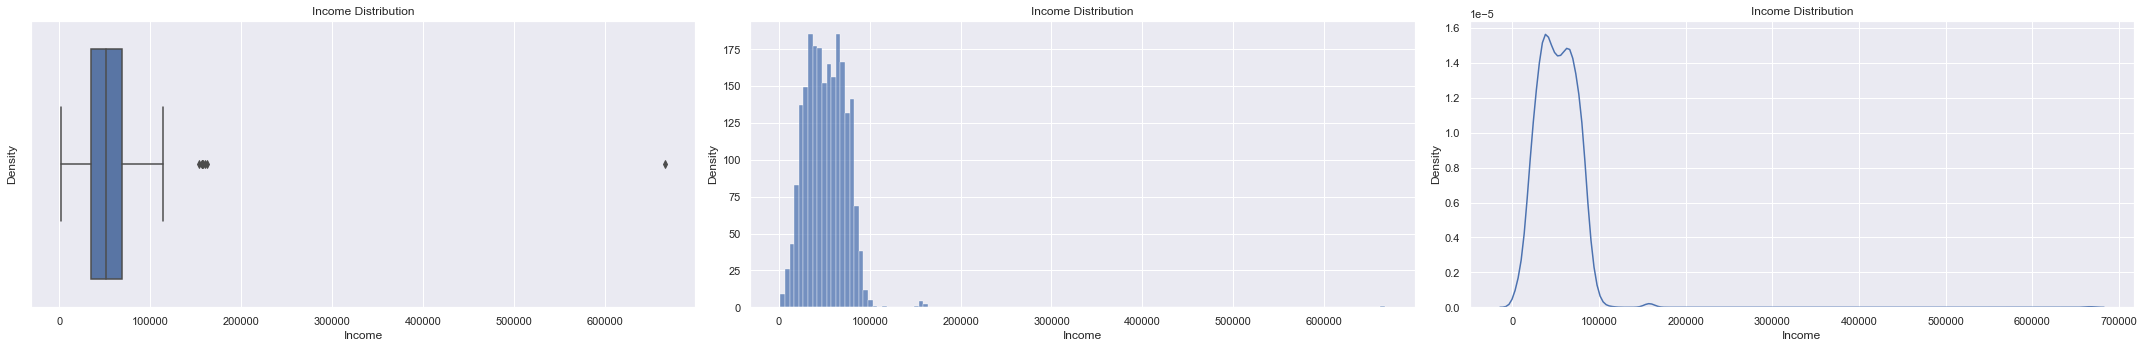

In [10]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(x =incomeDf['Income'], ax=axes[0])
sb.histplot(x =incomeDf['Income'], ax=axes[1])
sb.kdeplot(x =incomeDf['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')
print(f'Income Skew: {incomeDf["Income"].skew()}')

plt.tight_layout()
plt.show()

We can see that the skew for the income variables are highly positively skewed at above 6. This is due to the outlier at the income of 666666.

In order to try and correct the skew in the predictor variables, we will remove the outliers and observe the change in the dataset.

In [11]:
income_cleaned = removeOut(incomeDf)

Income Skew: 0.20396737819940863


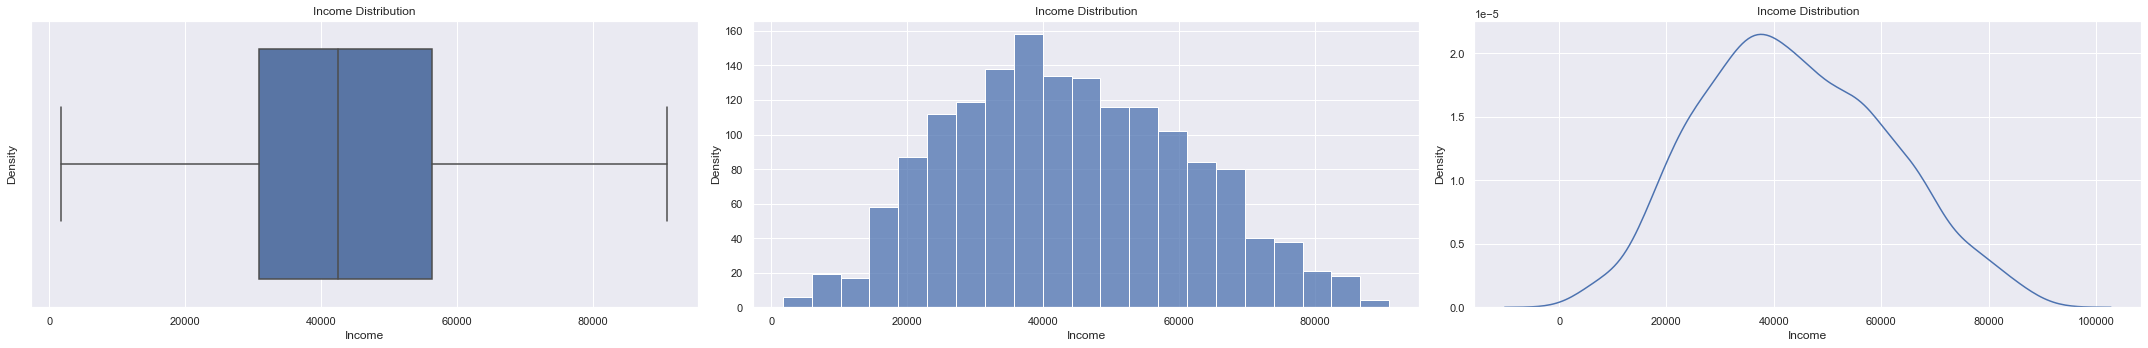

In [12]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(x = income_cleaned['Income'], ax=axes[0])
sb.histplot(x = income_cleaned['Income'], ax=axes[1])
sb.kdeplot(x = income_cleaned['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')
print(f'Income Skew: {income_cleaned["Income"].skew()}')

plt.tight_layout()
plt.show()

From the change in skewness, we can see that the skew of Income has decreased drastically to 0.2 which means that the Data is almost perfectly symmetric and good to use.

In [13]:
income_cleaned.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,43841.211250,2.282585,0.118850,0.834869,0.171598,0.120374,0.286114
std,17304.738865,3.103856,0.174124,1.177718,0.255886,0.179062,0.301915
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30831.750000,0.161256,0.010975,0.127716,0.022535,0.010620,0.071652
50%,42538.500000,0.713908,0.046031,0.316879,0.072010,0.047833,0.174057
75%,56336.500000,3.224102,0.145650,1.023963,0.201976,0.149123,0.396180
max,90933.000000,13.916021,0.892699,6.190549,1.302875,0.942197,1.427107


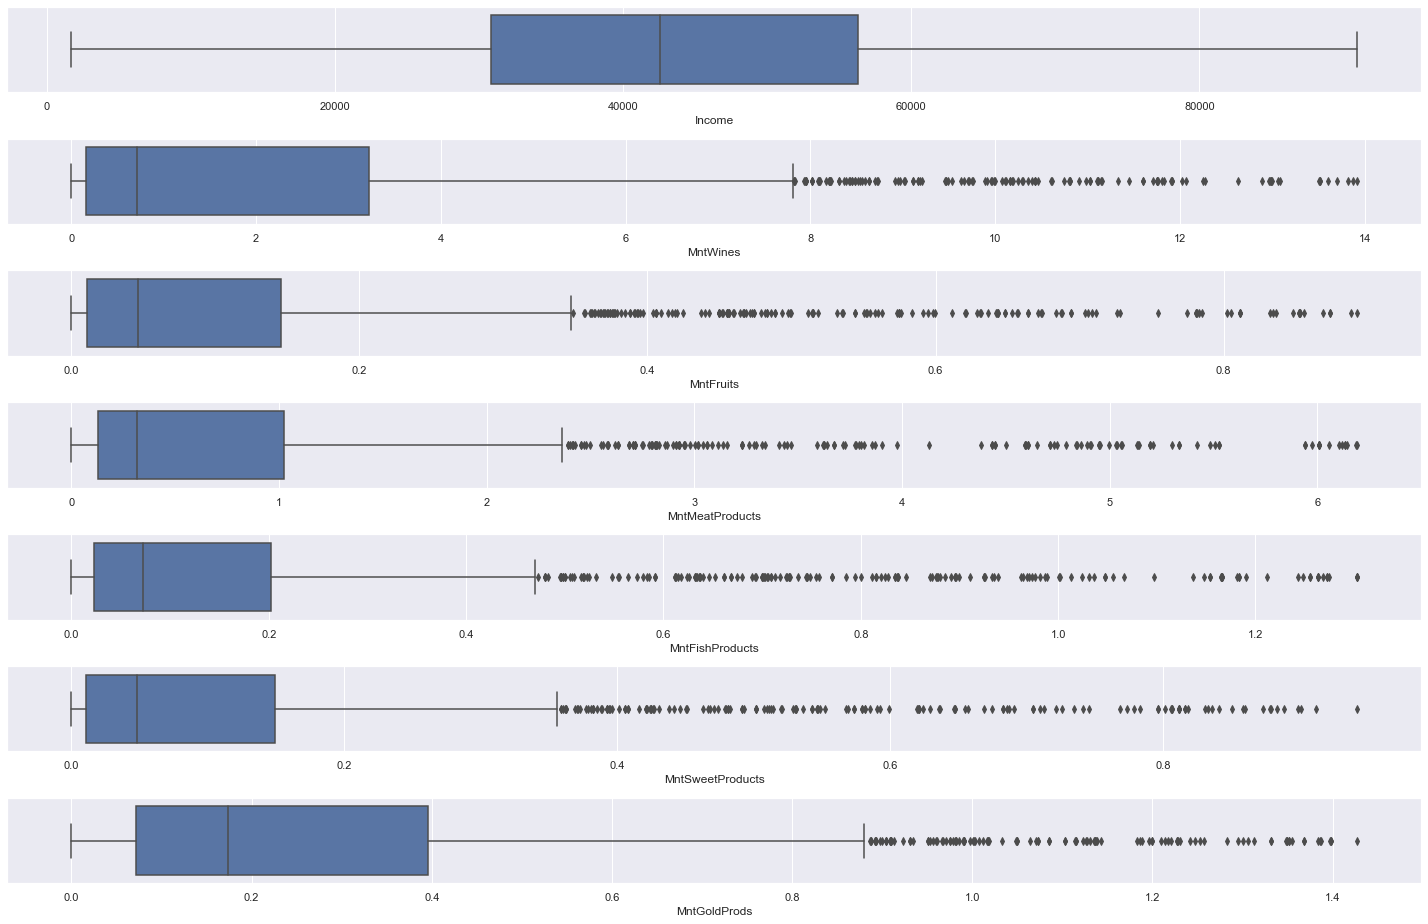

In [14]:
f, axes = plt.subplots(7, figsize=(20,13))

count=0
for var in income_cleaned:
    sb.boxplot(x = income_cleaned[var], orient = "h", ax = axes[count])
    count+=1

plt.tight_layout()
plt.show()


Although we have cleaned the data, there are still quite a significant amount of outliers for the response variable. Furthermore, the medians and spread at which the response variable have are quite similar with the exception of MntGoldProds having a higher median and both MntGoldProds and MntWines having a larger IQR spread. 

This means that income may not be the only factor to evaluate on the trend and prediction for the multiple response variables.

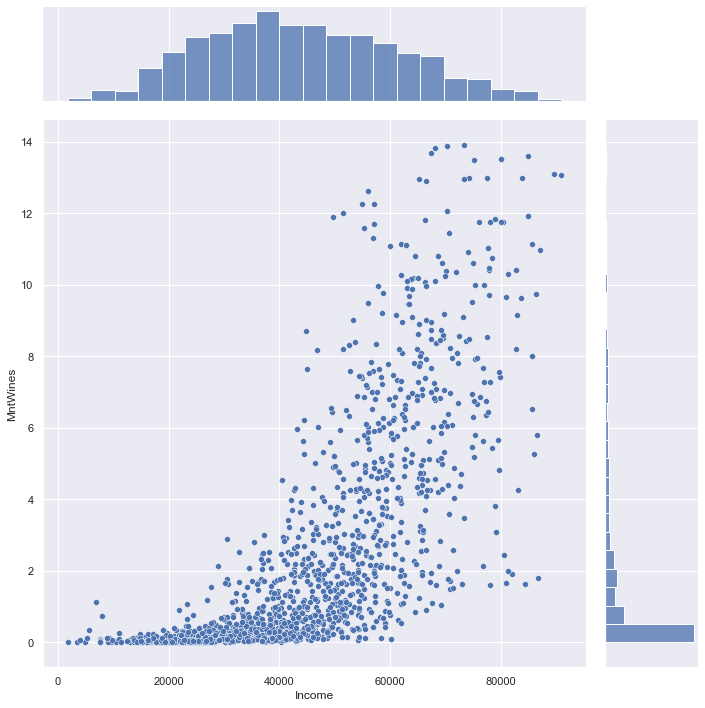

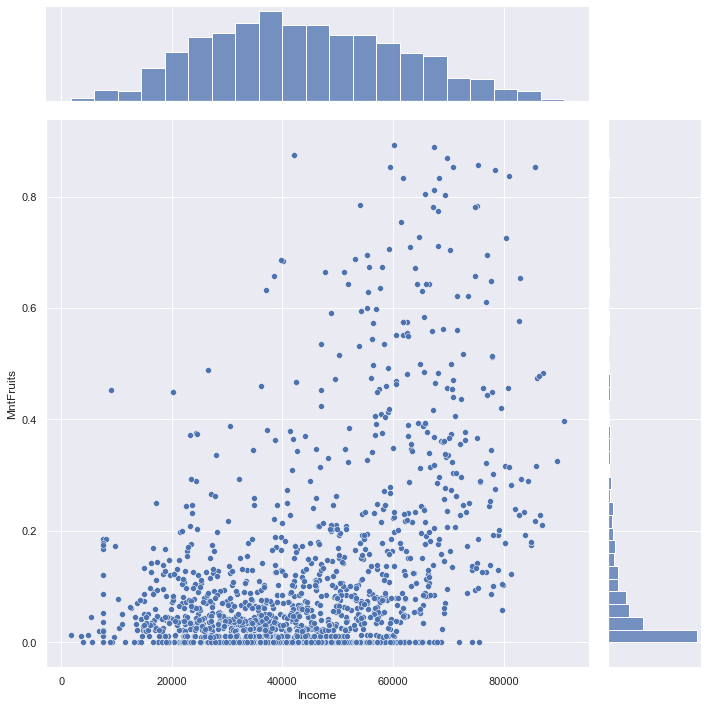

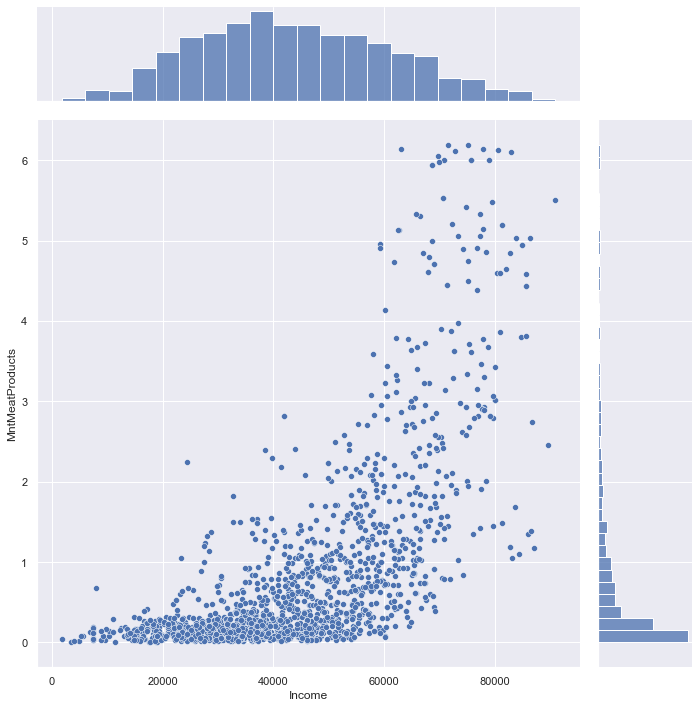

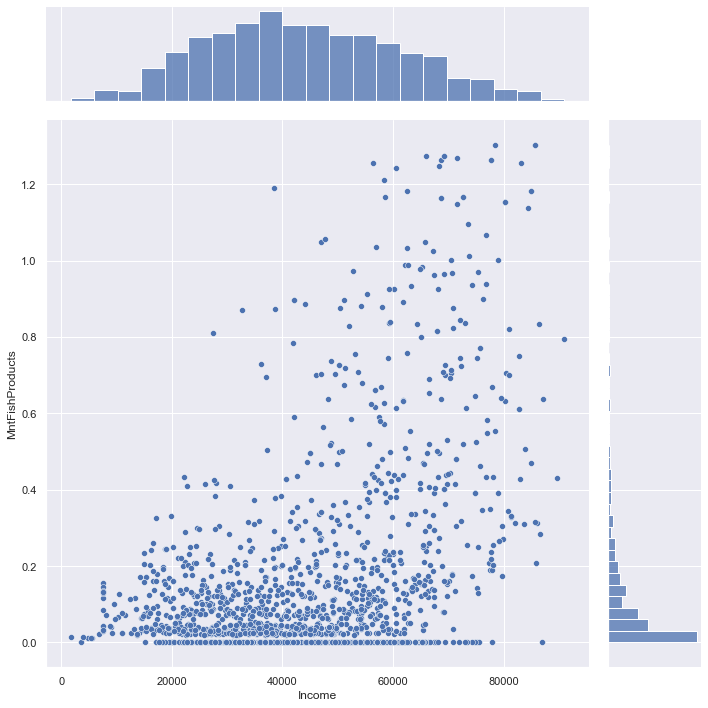

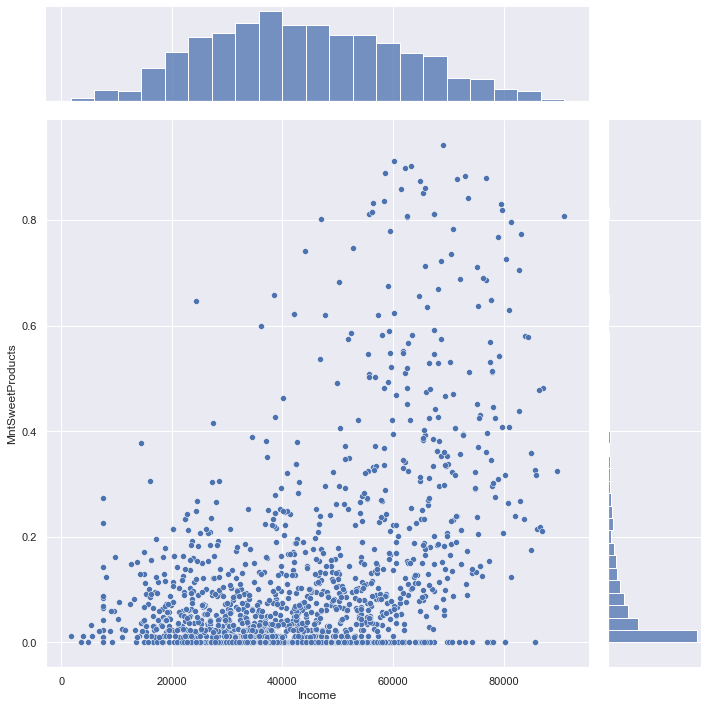

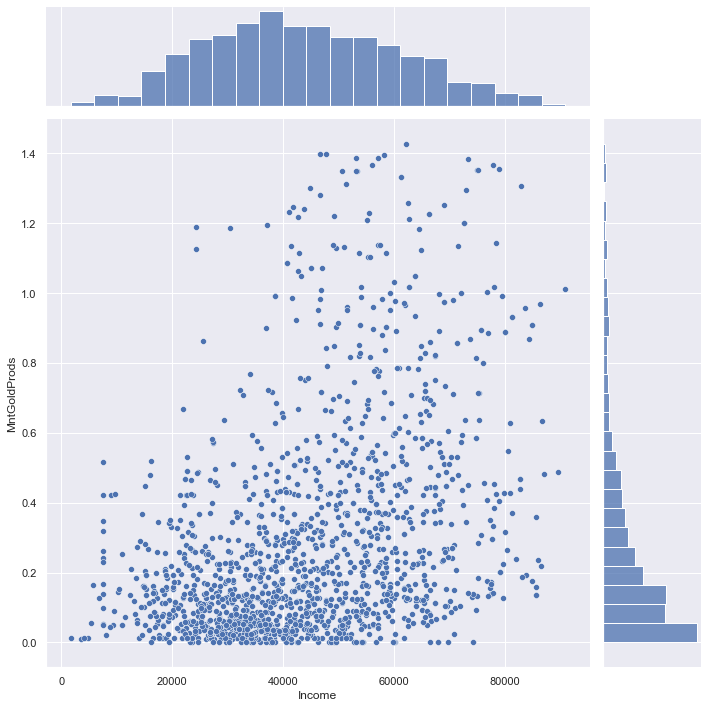

In [15]:
for var in income_cleaned.columns[1:]:
    sb.jointplot(data = income_cleaned, y = var, x = "Income", height = 10)

plt.tight_layout()
plt.show()

From the JointPlot of all the response variables against the income variable, we can see that most of the data are located close to 0. 

However there is a **increasing trend** to the data for all the plots despite the range of data being located near 0.

To further confirm the trend of data, we have plotted the heatmap to see the correlation between all the variables.

<AxesSubplot:>

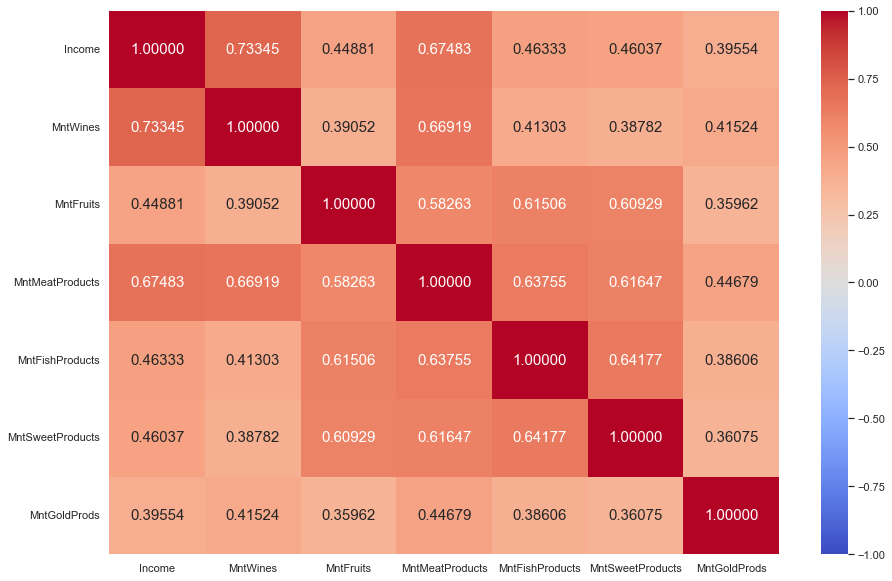

In [16]:
f = plt.figure(figsize=(15, 10))
sb.heatmap(income_cleaned.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".5f", annot_kws = {"size": 15}, cmap='coolwarm')

The correlation between the predictors and responses ar quite significant with some at 0.7 being highly positively correlated whereas most of the other correlations are moderately positively correlated.

## K-Means Clustering

We want to know where do all the ranges of each response variable fall under with respect to Income, we would utilise the K-Means Clustering

We will first use the Elbow method to decide the best number of clusters for observing a trend.

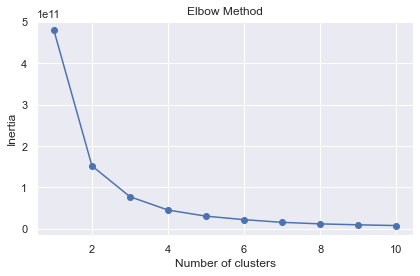

In [17]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(income_cleaned)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()


We realise that the point where adding more clusters does not significantly reduce the WCSS is where Number of Clusters = 4. Beyond this point, the rate of decrease in WCSS becomes less pronounced, suggesting diminishing returns from adding more clusters. Hence, we shall use 4 clusters for our 2D visualisation of clustering.

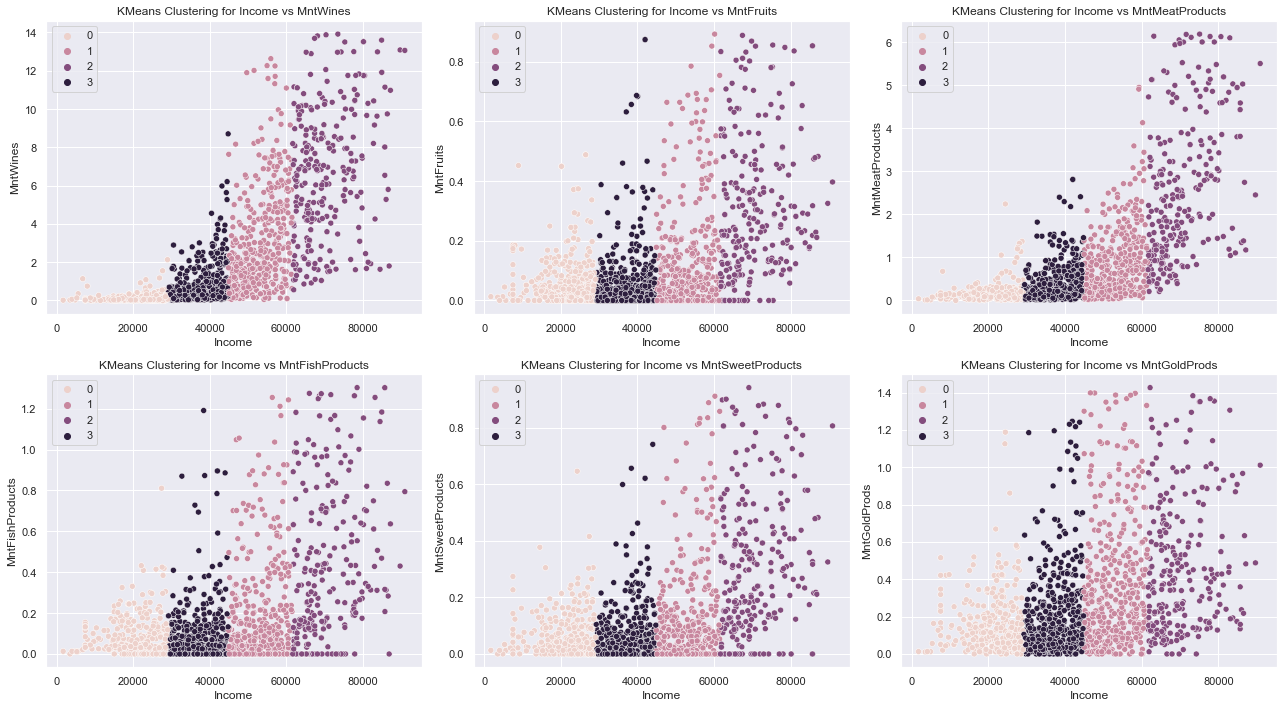

In [18]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

response_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

kmeans.fit(income_cleaned[["Income"] + response_variables])
    
for i, response_variable in enumerate(response_variables):
    row = i // 3
    col = i % 3
    sb.scatterplot(data=income_cleaned, x="Income", y=response_variable, hue=kmeans.labels_, ax=axes[row, col])
    axes[row, col].set_title(f'KMeans Clustering for Income vs {response_variable}')
    axes[row, col].set_xlabel("Income")
    axes[row, col].set_ylabel(response_variable)


plt.tight_layout()
plt.show()


### Observations

The K Means clusters break down the 4 clusters as we have input. It is observed that it is uniformly clustered in terms of the increasing income structures. As the income range increases, the amount of each product generally bought does increase with Wine, Meat and Gold being the more prominent ones in the higher income ranges at cluster 3. This supports our hypothesis and the fact that the amount of each 'luxurious' product bought would increase with a higher income bracket. However, we can also takeaway that it is true that there is a positive trend between the income range and the amount of each item bought as customers would have a higher income to purchase items in general.